# Basic implementation for walkers

In [53]:
 #pip install celluloid

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
from celluloid import Camera

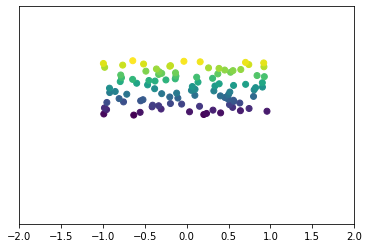

In [66]:
a = 2 # size of the domain
x0 = 0 # x center
t0 = 0 # initial time
tf = 1 # final time
N = 10 # number of data points after t0
dx = 0.1 #step size
num_walkers = 100 # number of walkers
dt = (tf - t0) / N # compute timestep
t = np.linspace(0,1,num=N+1) # create t array
length = 2*a # total length of system (assuming domain is [-a,a]
x = np.zeros((N+1,num_walkers)) # 2D array of walkers, where the jth column is one walker and the ith row is all the positions

# Random initial location uniform has parameters.
x[0,:] = np.random.uniform(-1, 1, size=num_walkers)
height = np.linspace(0,1,num = num_walkers)
for i in range(1,N+1):
    x[i,:] = x[i-1,:] - dx #np.clip(x[i-1,:] + dx, -a, a)

fig , ax1 = plt.subplots()
ax1.set_xlim((-a, a))
ax1.set_ylim((-a, a))
plt.yticks([])
ax1.scatter(x[0,:], height, c=range(num_walkers))

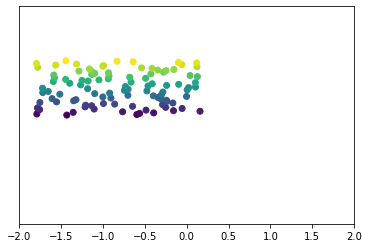

In [67]:
fig , ax1 = plt.subplots()
ax1.set_xlim((-a, a))
ax1.set_ylim((-a, a))
plt.yticks([])
ax1.scatter(x[8,:], height, c=range(num_walkers))

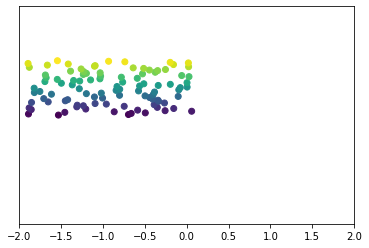

In [68]:
fig , ax1 = plt.subplots()

camera = Camera(fig)
for i in range(N):
    ax1.clear()
    ax1.set_xlim((-a, a))
    ax1.set_ylim((-a, a))
    plt.yticks([])
    ax1.scatter(x[i,:], height, c=range(num_walkers))
    camera.snap()

animation = camera.animate()
animation.save('walkers.gif')    

In [69]:
# !open walkers.gif

In [70]:
from ipywidgets import interact 
@interact
def interact_walker(i:(0, N, 1)=0):
    fig , ax1 = plt.subplots(1, 1,figsize=(10, 10))
    ax1.set_xlim((-a, a))
    ax1.set_ylim((-a, a))
    plt.yticks([])
    ax1.scatter(x[i,:], height, c=range(num_walkers))
    plt.grid(True)
    

interactive(children=(IntSlider(value=0, description='i', max=10), Output()), _dom_classes=('widget-interact',…

In [60]:
g  = lambda x: np.sin(x)
x = np.zeros((N+1,num_walkers))
x0 = np.linspace(0,2* np.pi,num=num_walkers)
x[0,:] = x0
for i in range(1,N+1):
    x[i,:] = x[i-1,:] + dx

@interact
def interact_transport(i:(0, N, 1)=0):
    x[i-1,:] + dx
    fig , ax1 = plt.subplots(1, 1,figsize=(10, 10))
    ax1.set_xlim((0, 2*a))
    ax1.set_ylim((-a, a))
    plt.yticks([])
    ax1.scatter(x[i,:], g(x0), c=range(num_walkers))
    plt.grid(True)

interactive(children=(IntSlider(value=0, description='i', max=10), Output()), _dom_classes=('widget-interact',…